<a href="https://colab.research.google.com/github/SSUcheese/computer_vision_lecture_review/blob/main/fundamental/selective_search_n_iou_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## selective search를 이용해 object detection을 위한 region proposal 영역을 도출

### selectivesearch 설치 및 이미지 로드

In [ ]:
pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=fe52f7b8603b357589256f358728eaca5d71792a91b7e0cdf30af90a178123a8
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [ ]:
!pwd

/content


In [ ]:
# data를 담을 디렉토리를 content 밑에 생성
# 참고로 !wget -O를 통해 지정된 웹 주소에서 받은 파일을 지정된 디렉토리의 설정한 이름으로 지정

!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2024-04-15 13:32:19--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0s      

2024-04-15 13:32:19 (133 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



(450, 375, 3)


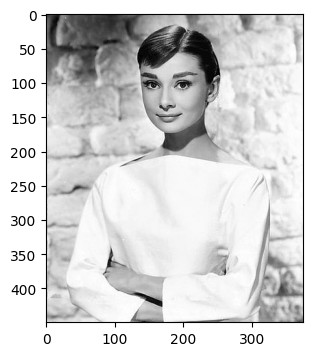

In [ ]:
import selectivesearch
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

# audrey 이미지를 cv2로 부르고 시각화
img = cv2.imread('/content/data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.show()

In [ ]:
# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
# scale을 키우면 큰 object 위주로 탐색하고 작게 설정하면 그 반대
# 아래 코드에선 객체 크기가 2000 이상인 object만 고른다.
# 또한 selectivesearch.selective_search()의 returns에서 첫 번째는 큰 의미가 없어 _로 처리.

_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

# regions의 len 뜻은 obj가 있을 것으로 추정되는 공간으로 41개 박스를 만들었다는 뜻이다.
print(type(regions), len(regions))
print(regions)

<class 'list'> 41
[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}, {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]}, {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]}, {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]}, {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]}, {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]}, {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]}, {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]}, {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]}, {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]}, {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]}, {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]}, {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]}, {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]}, {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]}, {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]

### 위 과정을 통해 반환된 region proposal에 대한 정보 확인 및 bounding box 시각화
* 반환된 regions 변수는 리스트 타입이지만 세부 원소로 안에 dictionary를 갖고 있다.
* rect는 bouding box의 좌측 상단 x,y 값과 bounding box의 너비와 높이를 의미한다.
* size는 segment로 뽑힌 object의 크기이다.
* labels는 해당 bounding box 내에 있는 object들의 고유 ID. 하나의 bouding box 안에 여러 object가 있을 수 있다.
* 참고로 list 요소는 뒤로 갈수록 큰 bounding box가 있는데, 앞에 있는 복수의 bounding box를 합친 것이다.

In [ ]:
regions[0]

{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}

In [ ]:
# rect 정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


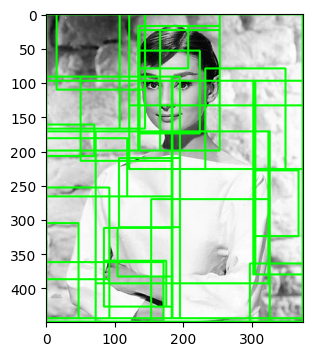

In [ ]:
# opencv의 rectangle()을 이용해서 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box 색깔 및 두께를 인자로 입력하면 이를 반영

green_rgb = (0, 255, 0)
img_rgb_copy = img_rgb.copy()  # 되도록 원본 이미지가 아닌 따로 copy로 따와서 보는 편이 낫다.
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy,(left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb_copy)
plt.show()

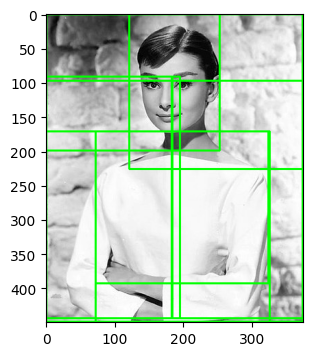

In [ ]:
# bouding box에서 크기가 큰 후보만 추출

cand_rects = [cand['rect'] for cand in regions if cand['size'] > 20000]

green_rgb = (0, 255, 0)
img_rgb_copy = img_rgb.copy()  # 되도록 원본 이미지가 아닌 따로 copy로 따와서 보는 편이 낫다.
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy,(left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb_copy)
plt.show()